In [1]:
import os
import kagglehub

# Download the dataset using KaggleHub
dataset_name = "huizecai/mushroom"
path = kagglehub.dataset_download(dataset_name)

print("Path to dataset files:", path)

c:\anaconda\envs\py3_11_11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\caijihuize\.cache\kagglehub\datasets\huizecai\mushroom\versions\3


In [2]:
dataset_path = path + '/archive/data'
label_path = path + '/archive/label.txt'

# 获取所有子目录（即蘑菇类别）
dir_names = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# 读取 label.txt 并解析内容
categories = {}
with open(label_path, 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 2:
            category_name = parts[0]
            category_id = parts[1]
            categories[category_id] = category_name

# 统计每种类别的图像数量
category_counts = {}
for category_id in categories.keys():
    if category_id in dir_names:  # 确保目录存在
        category_dir = os.path.join(dataset_path, category_id)
        num_images = len([f for f in os.listdir(category_dir) if f.endswith('.jpg') or f.endswith('.jpeg')])
        category_counts[categories[category_id]] = num_images

print("Category counts:", category_counts)

Category counts: {'羊肚菌': 170, '牛肝菌': 157, '鸡油菌': 163, '鸡枞菌': 166, '青头菌': 193, '奶浆菌': 194, '干巴菌': 167, '虎掌菌': 187, '白葱牛肝菌': 190, '老人头菌': 176, '猪肚菌': 122, '谷熟菌': 171, '白参菌': 179, '黑木耳': 182, '银耳': 160, '金耳': 178, '猴头菇': 183, '香菇': 179, '平菇': 165, '金针菇': 140, '口蘑': 173, '鹿茸菇': 175, '榆黄蘑': 177, '榛蘑': 176, '草菇': 166, '鸡腿菇': 161, '茶树菇': 177, '蟹味菇': 146, '白玉菇': 158, '红菇': 184, '杏鲍菇': 162, '松茸': 191, '姬松茸': 185, '松露': 157, '竹荪': 184, '虫草花': 194}


In [3]:
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import os

# 下载并保存字体文件
font_url = "https://github.com/caijihuize/Mushroom_Classification/raw/main/SimHei.ttf"
font_name = "SimHei.ttf"
if not os.path.exists(font_name):
    urllib.request.urlretrieve(font_url, font_name)

# 设置字体属性
font_prop = FontProperties(fname=font_name)
plt.rcParams['font.family'] = font_prop.get_name()


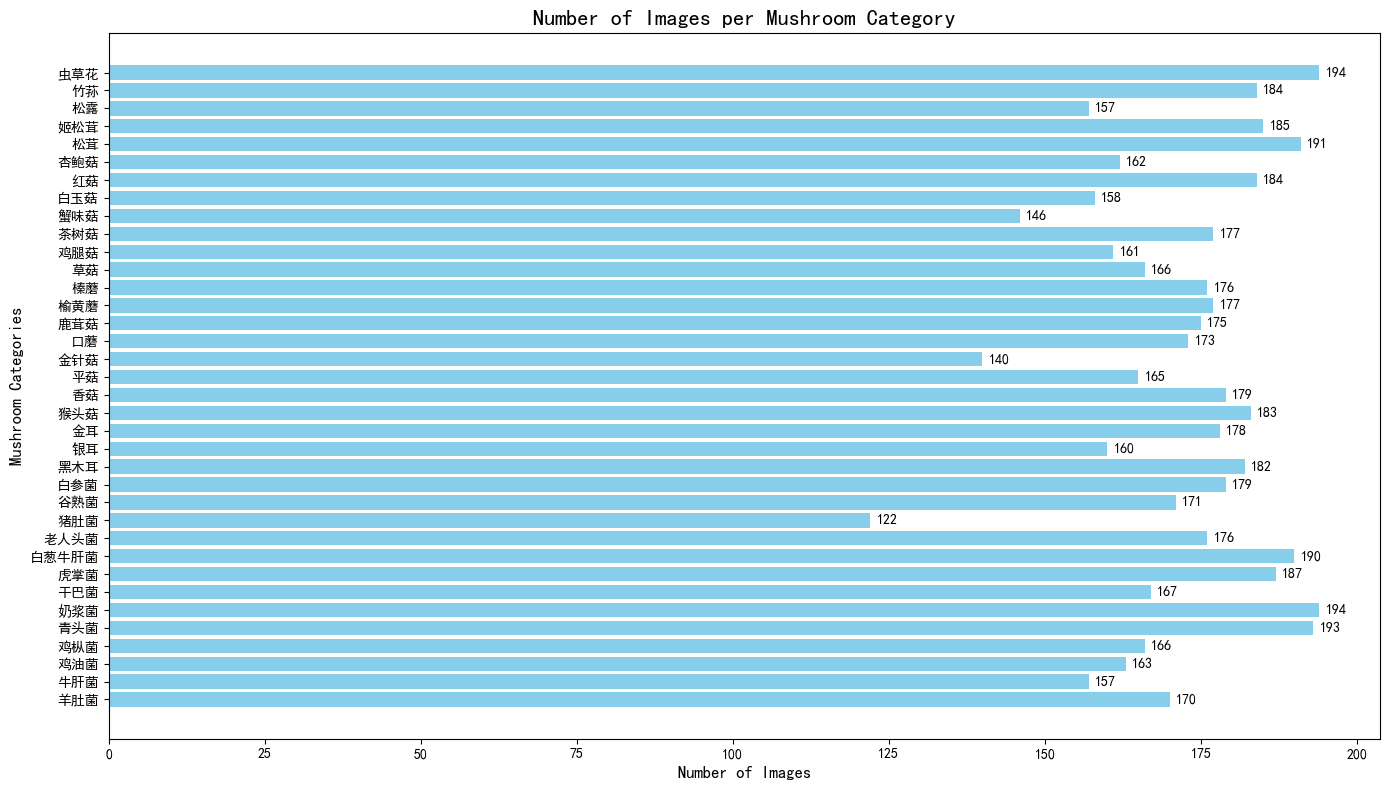

In [4]:
# 准备数据
categories_readable = list(category_counts.keys())
counts = list(category_counts.values())

# 创建一个新的图形
plt.figure(figsize=(14, 8))

# 绘制柱状图
bars = plt.barh(categories_readable, counts, color='skyblue')

# 添加数据标签
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, '%d' % int(width), va='center')

# 设置标题和标签
plt.title('Number of Images per Mushroom Category', fontsize=16)
plt.xlabel('Number of Images', fontsize=12)
plt.ylabel('Mushroom Categories', fontsize=12)

# 自动调整布局
plt.tight_layout()

# 显示图形
plt.show()